In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [4]:
train_values = pd.read_csv('../datasets/train_values.csv')

### Porcentaje de la cantidad de edificaciones con cada grado de daño segun  el número de pisos

In [5]:
numero_pisos = train_values[['building_id','count_floors_pre_eq']]

In [6]:
numero_pisos = train_labels\
    .merge(numero_pisos, how='inner')\
    .rename(columns={'count_floors_pre_eq':'Número de pisos'})

In [7]:
grado_danio_segun_numero_pisos = numero_pisos\
    .groupby(['Número de pisos','damage_grade'])\
    .agg('count')\
    .reset_index()

total_buildings_by_floor = numero_pisos[['Número de pisos', 'building_id']]\
    .groupby('Número de pisos')\
    .count()\
    .reset_index()\
    .rename(columns= { 'building_id': 'total_buildings_by_floor' } )

grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos\
    .merge(total_buildings_by_floor)

grado_danio_segun_numero_pisos['percentage'] = (grado_danio_segun_numero_pisos['building_id'] * 100) / grado_danio_segun_numero_pisos['total_buildings_by_floor']
df_grado_porcentaje_grado_de_danio = grado_danio_segun_numero_pisos.loc[grado_danio_segun_numero_pisos['percentage']<100,:]
grado_danio_segun_numero_pisos[['Número de pisos', 'damage_grade', 'percentage']]

,Número de pisos,damage_grade,percentage
0,1,1,22.18
1,1,2,51.43
2,1,3,26.39
3,2,1,8.04
4,2,2,60.00
5,2,3,31.96
6,3,1,4.56
7,3,2,51.21
8,3,3,44.23
9,4,1,13.03


In [8]:
grado_danio_segun_numero_pisos = grado_danio_segun_numero_pisos\
    .pivot(index='Número de pisos', columns='damage_grade',values='percentage')

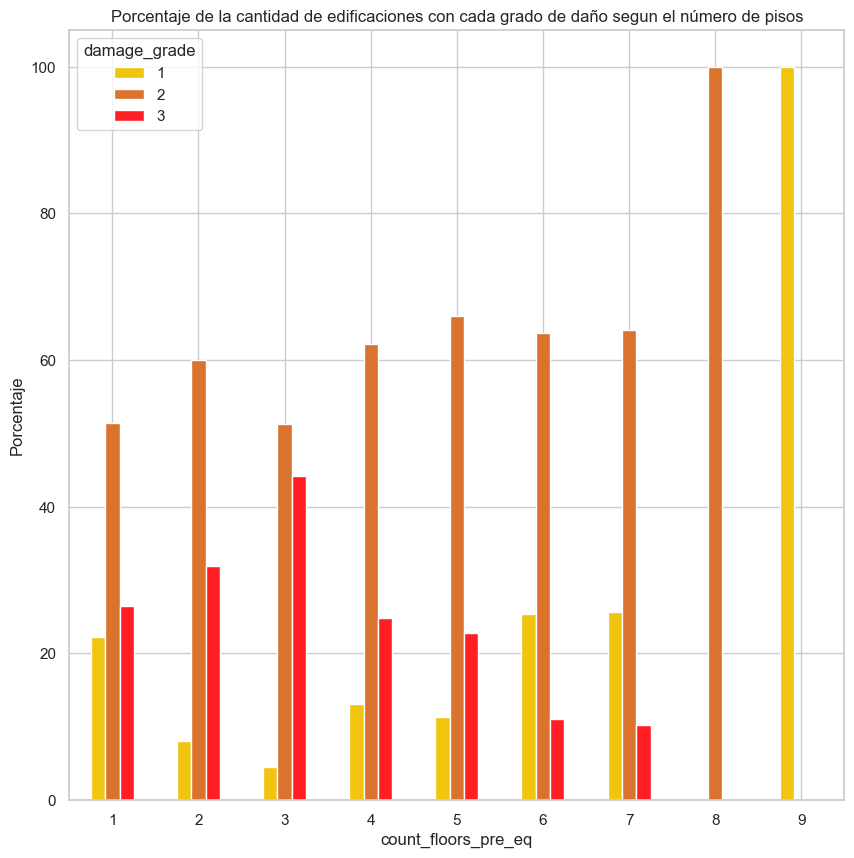

In [10]:
grado_danio_segun_numero_pisos.plot(kind='bar',figsize=(10,10), rot=0, \
 title='Porcentaje de la cantidad de edificaciones con cada grado de daño segun el número de pisos',
                                   color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' }
)
ax=plt.gca()
ax.set_xlabel('count_floors_pre_eq')
ax.set_ylabel('Porcentaje');

Sabemos que la gran mayoria de edificaciones en Nepal tienen dos pisos, el 60% de esas edificaciones sufrieron un grado de daño 2

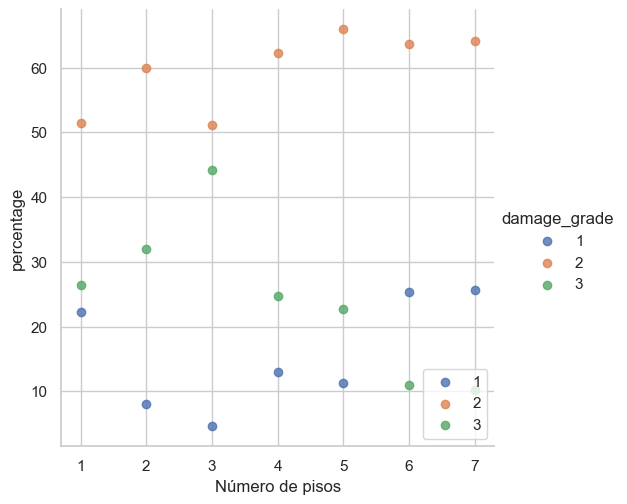

In [11]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

#df_ages_and_damage_with_percentage_filtered = df_ages_and_damage_with_percentage.loc[df_ages_and_damage_with_percentage['age'] <= 100, :]
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Número de pisos", y="percentage", data=df_grado_porcentaje_grado_de_danio, \
           fit_reg=False, hue='damage_grade', legend=True)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()